In [ ]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import torch

In [ ]:
# Load data into NumPy arrays
measurements = np.load('measurements.npy')
pixels = np.load('pixels.npy')
tx_coords = np.load('tx_coords.npy')
rx_coords = np.load('rx_coords.npy')
transmit_waveform = np.load('transmit_wfm.npy')

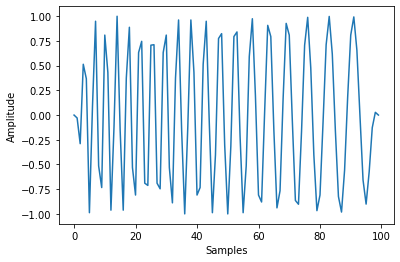

In [ ]:
# Plot the transmitted waveform
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.plot(transmit_waveform)

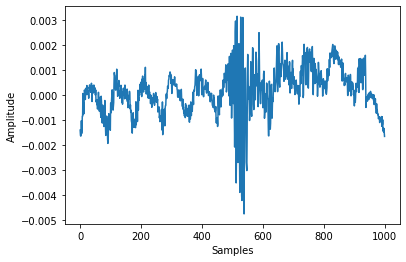

In [ ]:
# Plot example measured waveform
x = measurements.transpose(0,1)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.plot(x[0])
plt.show()

In [ ]:
# Match filter the measured signals in frequency domain and compute the analytic signal
x_hilbert = signal.hilbert(x)
x_hilbert_fft = np.fft.fft(x_hilbert)
t_fft = np.fft.fft(transmit_waveform,1000)
x_analytic = np.fft.ifft(x_hilbert_fft * np.conj(t_fft))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


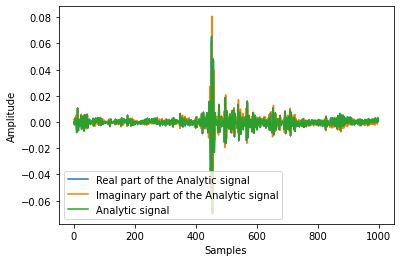

In [ ]:
# Plot the Analytic signal
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.plot(x_analytic[0].real,label = 'Real part of the Analytic signal')
plt.plot(x_analytic[0].imag,label = 'Imaginary part of the Analytic signal')
plt.plot(x_analytic[0],label = 'Analytic signal')
plt.legend()
plt.show()

In [ ]:
# Calculate the magnitude and phase of the analytic signal 
x_analytic_fft = np.fft.fftshift(np.fft.fft2(x_analytic))
x_analytic_mag = 20*np.log10(np.abs(x_analytic_fft))
x_analytic_phase = np.angle(x_analytic_fft)

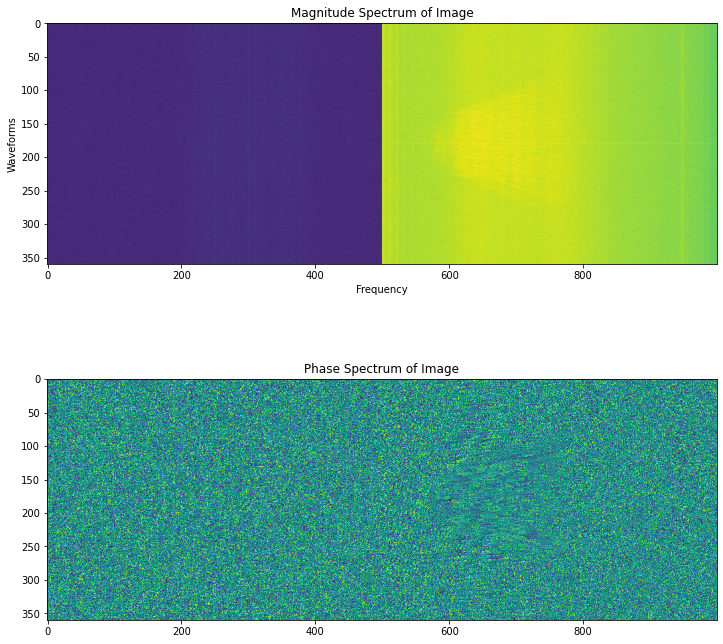

In [ ]:
# Plot the magnitude and Phase spectrum of the Analytic signal
plt.figure(figsize = (12,12))
plt.subplot(2,1,1)
plt.title('Magnitude Spectrum of Image')
plt.ylabel('Waveforms')
plt.xlabel('Frequency')
plt.imshow(x_analytic_mag)
plt.subplot(2,1,2)
plt.title('Phase Spectrum of Image')
plt.imshow(x_analytic_phase)

In [ ]:
# Declare speed of sound and sampling frequency as constants, and initialize array to store pixel values
c = 344.351
Fs = 100000
output = np.zeros((1,22500))

In [ ]:
# Beamform the image
for i in range(tx_coords.shape[0]):
  d1 = (np.sqrt(np.sum((pixels - tx_coords[i])**2,1)))
  d2 = (np.sqrt(np.sum((pixels - rx_coords[i])**2,1))) 
  tof = ((d1+d2)/c)*Fs
  sinc_interp = np.array([np.sinc((tof - j)) for j in range(1000)])
  sinc_interp = sinc_interp.T
  output = output + np.sum(x_analytic[i,:][None,:]*sinc_interp,1)

In [ ]:
# Reshape output array to form 2-D image
output = output.reshape(150,150)

<function matplotlib.pyplot.show(*args, **kw)>

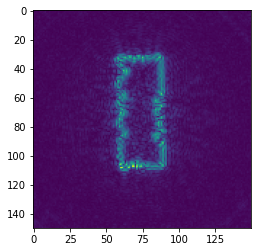

In [ ]:
# Display the beamformed image
plt.imshow(np.abs(output))
plt.show

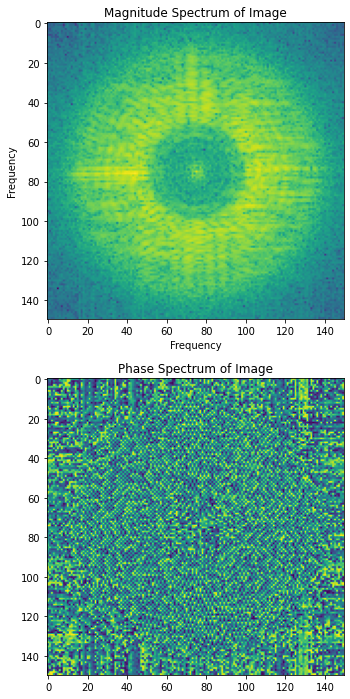

In [ ]:
# Display the magnitude and phase spectrum of the beamformed image
output_fft = np.fft.fftshift(np.fft.fft2(output))
magnitude = 20*np.log10(np.abs(output_fft))
phase = np.angle(output_fft)
plt.figure(figsize = (12,12))
plt.subplot(2,1,1)
plt.title('Magnitude Spectrum of Image')
plt.xlabel('Frequency')
plt.ylabel('Frequency')
plt.imshow(magnitude)
plt.subplot(2,1,2)
plt.title('Phase Spectrum of Image')
plt.imshow(phase)